# Imports

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

import os
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import utils
from sklearn.model_selection import train_test_split

2022-08-16 03:09:38.784669: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-16 03:09:38.784757: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Load Data Set

The data sets of this project come from http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/

- The image of english font stores in data-set/EnglishFnt.tgz

The data set is extracted in data-set

In [2]:
classNames = []
# Add 0-9 to classNames
for i in range(10):
    classNames.append(str(i))
# Add A-Z to classNames
for i in range(65, 91):
    classNames.append(chr(i))
# Add a-z to classNames
for i in range(97, 123):
    classNames.append(chr(i))

In [3]:
dataSetImg, dataSetLabel = [], []
# Construct data set path data-set/English/Fnt
dataSetPath = os.path.join("data-set", "English", "Fnt")
# List all sub directories in data-set/English/Fnt
dirList = os.listdir(dataSetPath)
dirList.sort()
# Traverse through all sub directories in data-set/English/Fnt
for i in range(len(dirList)):
    # List all files in current sub directory
    fileList = os.listdir(os.path.join(dataSetPath, dirList[i]))
    # Traverse through all files in current sub directory
    for j in range(len(fileList)):
        # Read image
        img = plt.imread(os.path.join(dataSetPath, dirList[i], fileList[j]))
        # Convert grayscale image to RGB
        if img.ndim == 2:
            img = np.stack((img,)*3, -1)
        # Resize image to 32x32
        img = tf.image.resize(img, [32, 32])
        img = tf.cast(img, tf.float64)
        # Add image to data set
        dataSetImg.append(img)
        # Add label to data set
        dataSetLabel.append(i)

len(dataSetImg), len(dataSetLabel)

2022-08-16 03:09:44.404387: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-16 03:09:44.404512: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-16 03:09:44.404610: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vultr): /proc/driver/nvidia/version does not exist
2022-08-16 03:09:44.406898: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(62992, 62992)

In [4]:
# Convert data set to numpy array
dataSetImg = np.array(dataSetImg)
dataSetLabel = np.array(dataSetLabel)
dataSetImg.shape, dataSetLabel.shape

((62992, 32, 32, 3), (62992,))

In [5]:
# Randomly shuffle data set
dataSetImg, dataSetLabel = utils.shuffle(dataSetImg, dataSetLabel)
len(dataSetImg), len(dataSetLabel)

(62992, 62992)

# Split Data Set

In [6]:
def CheckDataSetDisplay(dataSetImg, dataSetLabel):
    # Randomly pick 16 images from data set and plot them
    sampleIndex = np.random.choice(len(dataSetImg), 16)
    for i in range(len(sampleIndex)):
        plt.subplot(4, 4, i+1)
        plt.imshow(dataSetImg[sampleIndex[i]])
        plt.title(dataSetLabel[sampleIndex[i]])
        plt.axis("off")

(50393, 12599, 50393, 12599)

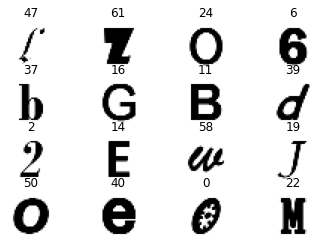

In [7]:
# Split data set into training set and test set
trainImg, testImg, trainLabel, testLabel = train_test_split(
    dataSetImg,
    dataSetLabel,
    test_size=0.2
)
CheckDataSetDisplay(trainImg, trainLabel)
len(trainImg), len(testImg), len(trainLabel), len(testLabel)

In [8]:
# Config the data set size for training and test set
# Set to negative value to use all data set
TRAINING_SET_SIZE = 1000
TEST_SET_SIZE = 100

In [9]:
if TRAINING_SET_SIZE > 0:
    trainingSetSize = min(TRAINING_SET_SIZE, len(trainImg))
    # Randomly pick training set size images from training set
    trainImg, trainLabel = utils.shuffle(trainImg, trainLabel)
    trainImg = trainImg[:trainingSetSize]
    trainLabel = trainLabel[:trainingSetSize]
if TEST_SET_SIZE > 0:
    testSetSize = min(TEST_SET_SIZE, len(testImg))
    # Randomly pick test set size images from test set
    testImg, testLabel = utils.shuffle(testImg, testLabel)
    testImg = testImg[:testSetSize]
    testLabel = testLabel[:testSetSize]

len(trainImg), len(testImg), len(trainLabel), len(testLabel)

(1000, 100, 1000, 100)

# Construct Model

In [10]:
def CreateModel():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation="relu"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation="relu"))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(len(classNames), activation="softmax"))
    model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
    
    return model

In [11]:
model = CreateModel()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

# Training

In [12]:
checkpoint_path = "check-points/img-classification.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
cpCallback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                save_weights_only=True,
                                                verbose=1)

In [13]:
trainImg.shape

(1000, 32, 32, 3)

In [14]:
history = model.fit(trainImg, trainLabel, epochs=10, 
                    validation_data=(testImg, testLabel),
                    callbacks=[cpCallback])

Epoch 1/10


/home/fangjun/English-CNN-OCR/venv/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


31/32 [============================>.] - ETA: 0s - loss: 4.1163 - accuracy: 0.0232
Epoch 1: saving model to check-points/img-classification.ckpt
32/32 [==============================] - 2s 48ms/step - loss: 4.1165 - accuracy: 0.0230 - val_loss: 4.0725 - val_accuracy: 0.0700
Epoch 2/10
31/32 [============================>.] - ETA: 0s - loss: 3.8606 - accuracy: 0.1018
Epoch 2: saving model to check-points/img-classification.ckpt
32/32 [==============================] - 2s 56ms/step - loss: 3.8568 - accuracy: 0.1030 - val_loss: 3.6250 - val_accuracy: 0.1600
Epoch 3/10
30/32 [===========================>..] - ETA: 0s - loss: 2.9102 - accuracy: 0.2531
Epoch 3: saving model to check-points/img-classification.ckpt
32/32 [==============================] - 1s 41ms/step - loss: 2.8837 - accuracy: 0.2620 - val_loss: 2.8004 - val_accuracy: 0.2800
Epoch 4/10
31/32 [============================>.] - ETA: 0s - loss: 1.8371 - accuracy: 0.4940
Epoch 4: saving model to check-points/img-classification.ck

# Evaluation

In [15]:
# Evaluate the model
loss, acc = model.evaluate(testImg, testLabel, verbose=2)
print("Current model, accuracy: {:5.2f}%".format(100 * acc))

4/4 - 0s - loss: 1.6142 - accuracy: 0.6700 - 458ms/epoch - 115ms/step
Current model, accuracy: 67.00%


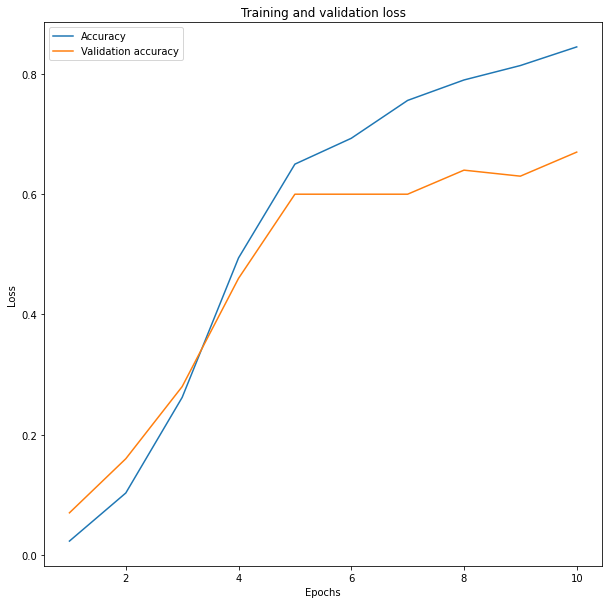

In [16]:
history_dict = history.history
fig, ax = plt.subplots(figsize=(10,10))
accuracy = history_dict["accuracy"]
val_accuracy = history_dict["val_accuracy"]
epochs = range(1, len(accuracy) + 1)
ax.plot(epochs, accuracy, label="Accuracy")
ax.plot(epochs, val_accuracy, label="Validation accuracy")
ax.set_title("Training and validation loss")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.legend()
plt.show()

# Test the model in an image

Text(0.5, 0, 'b')

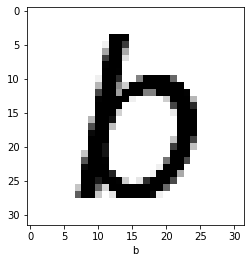

In [34]:
indx = 100
testImg = dataSetImg[indx]
testLabel = classNames[dataSetLabel[indx]]
fig, ax = plt.subplots()
ax.imshow(testImg)
ax.set_xlabel(testLabel)

1/1 [==============================] - 0s 25ms/step


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

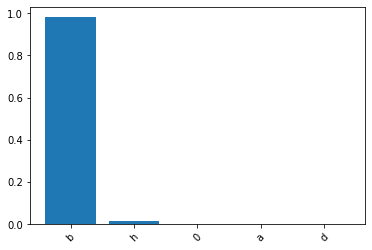

In [35]:
predictRes = model.predict(testImg.reshape(1,32,32,3))
top5Prediction = np.argsort(predictRes[0])[-5:][::-1]
predictResTop5 = np.sort(predictRes[0])[-5:][::-1]
top5PredictionName = [classNames[i] for i in top5Prediction]

fig, ax = plt.subplots()
ax.bar(top5PredictionName, predictResTop5)
plt.xticks(rotation=45)